In [1]:
pip install --upgrade openpyxl


Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd

# Specify the file path or URL to your Excel file
file_path = 'C:/Users/binay/OneDrive/Documents/Georgian/Data analytics project/file.csv'

# Read the Excel file into a Pandas DataFrame
df = pd.read_csv(file_path)
print(df)




       VIN (1-10)    County       City State  Postal Code  Model Year    Make  \
0      5YJXCAE26J    Yakima     Yakima    WA      98908.0        2018   TESLA   
1      JHMZC5F37M    Kitsap    Poulsbo    WA      98370.0        2021   HONDA   
2      5YJ3E1EB0K      King    Seattle    WA      98199.0        2019   TESLA   
3      1N4AZ0CP5D      King    Seattle    WA      98119.0        2013  NISSAN   
4      5YJSA1E21H  Thurston      Lacey    WA      98516.0        2017   TESLA   
...           ...       ...        ...   ...          ...         ...     ...   
10212  5YJ3E1EB8N     Clark  Vancouver    WA      98683.0        2022   TESLA   
10213  5YJYGDEE8M      King       Kent    WA      98031.0        2021   TESLA   
10214  JTDKARFP2H     Clark  Vancouver    WA      98662.0        2017  TOYOTA   
10215  WMW13DJ00N     Clark  Vancouver    WA      98683.0        2022    MINI   
10216  1N4AZ0CP5F      King    Seattle    WA      98125.0        2015  NISSAN   

             Model         

In [3]:
!pip install pandas matplotlib




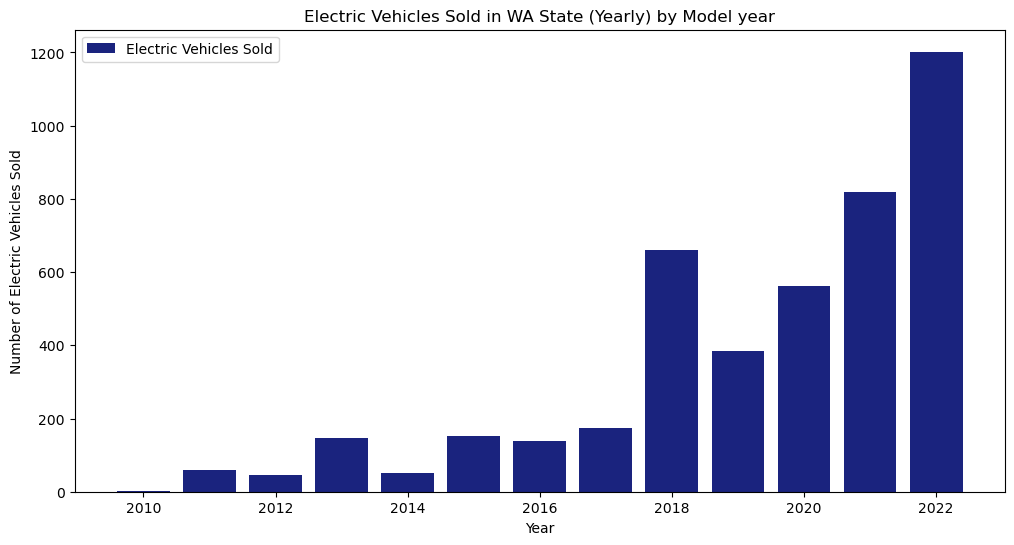

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your file is named "electric_vehicle_data.csv" and has columns 'Model Year' and 'Make'
file_path = "C:/Users/binay/OneDrive/Documents/Georgian/Data analytics project/file.csv"  # Update the path accordingly

# Read the data from CSV
df = pd.read_csv(file_path)

# Filter data for the years 2010 to 2022
df_filtered = df[(df['Model Year'] >= 2010) & (df['Model Year'] <= 2022)]

# Counting the number of occurrences of each car manufacturer in each year
df_count = df_filtered.groupby(['Model Year', 'Make']).size().reset_index(name='Count')

# Creating a bar chart with the count on the y-axis
plt.figure(figsize=(12, 6))
plt.bar(df_count['Model Year'], df_count['Count'], color='#1A237E', label='Electric Vehicles Sold')

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Number of Electric Vehicles Sold')
plt.title('Electric Vehicles Sold in WA State (Yearly) by Model year')
plt.legend()

# Show the plot
plt.show()


In [13]:
%matplotlib inline

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your file is named "electric_vehicle_data.csv" and has columns 'Make' and 'VIN9'
file_path = "C:/Users/binay/OneDrive/Documents/Georgian/Data analytics project/file.csv"  # Update the path accordingly

# Read the data from CSV
df = pd.read_csv(file_path)

# Group by 'Make' and sum the occurrences of VIN9 (1-10) for each make
make_vin_count = df.groupby('Make')['VIN (1-10)'].sum().reset_index()

# Sort the dataframe by VIN9 counts in descending order
make_vin_count = make_vin_count.sort_values(by='VIN (1-10)', ascending=False)

# Creating a bar chart to visualize total sales for each make
plt.figure(figsize=(4,4))  # Adjust the figure size
plt.bar(make_vin_count['Make'], make_vin_count['VIN (1-10)'], color='skyblue', label='Total Sales')

# Adding labels and title
plt.xlabel('Make')
plt.ylabel('Total Sales (VIN9)')
plt.title('Total Sales by Make based on VIN9 (1-10)')

# Show the plot
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.tight_layout()  # Adjust layout for better appearance
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.3)  # Adjust layout parameters
plt.show()


C:\Users\binay\AppData\Local\Temp\ipykernel_16972\2424807286.py:27: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()  # Adjust layout for better appearance


ValueError: Image size of 409800x403 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 400x400 with 1 Axes>

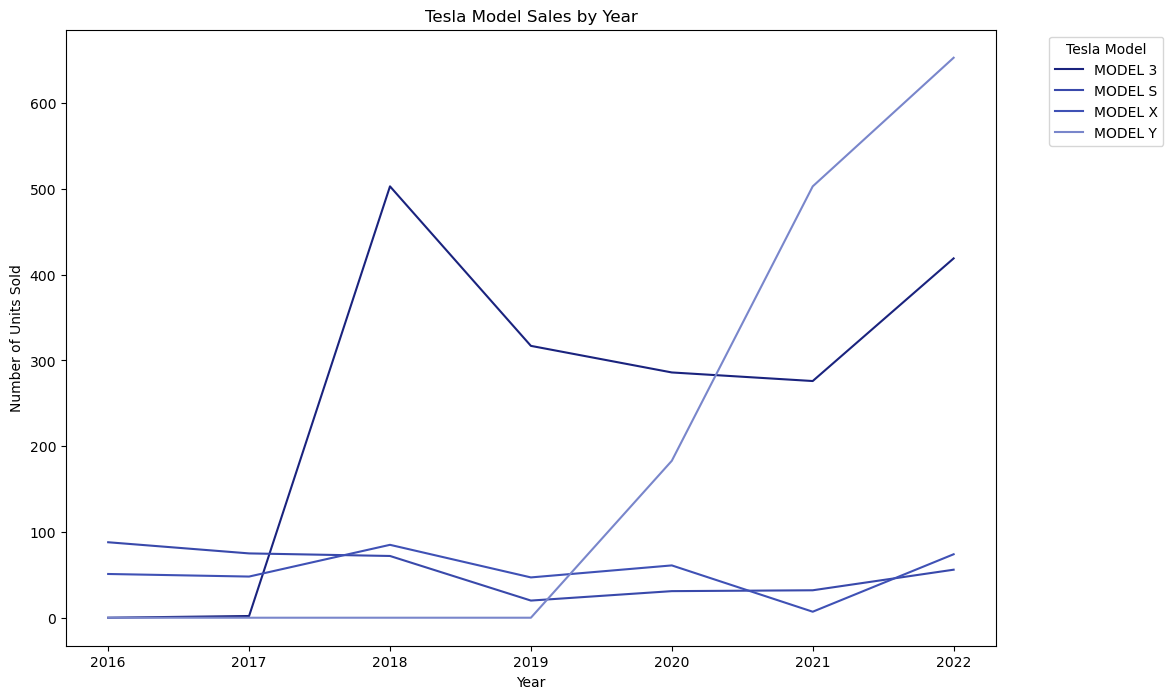

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your dataset is stored in a DataFrame named 'df'

# Filter rows with Make as 'TESLA' and Model Years from 2016 to 2022
tesla_data = df[(df['Make'] == 'TESLA') & (df['Model'] != 'ROADSTER') & (df['Model Year'] >= 2016) & (df['Model Year'] <= 2022)]

# Group by Model Year and Model, then sum the occurrences
tesla_model_counts = tesla_data.groupby(['Model Year', 'Model']).size().unstack().fillna(0)

# Define custom colors
colors = ['#1A237E', '#3949AB', '#3F51B5', '#7986CB']

# Plotting a line chart with custom colors and no markers
tesla_model_counts.plot(kind='line', figsize=(12, 8), color=colors, marker='', linestyle='-')

# Adding labels and title
plt.title('Tesla Model Sales by Year')
plt.xlabel('Year')
plt.ylabel('Number of Units Sold')
plt.legend(title='Tesla Model', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.show()


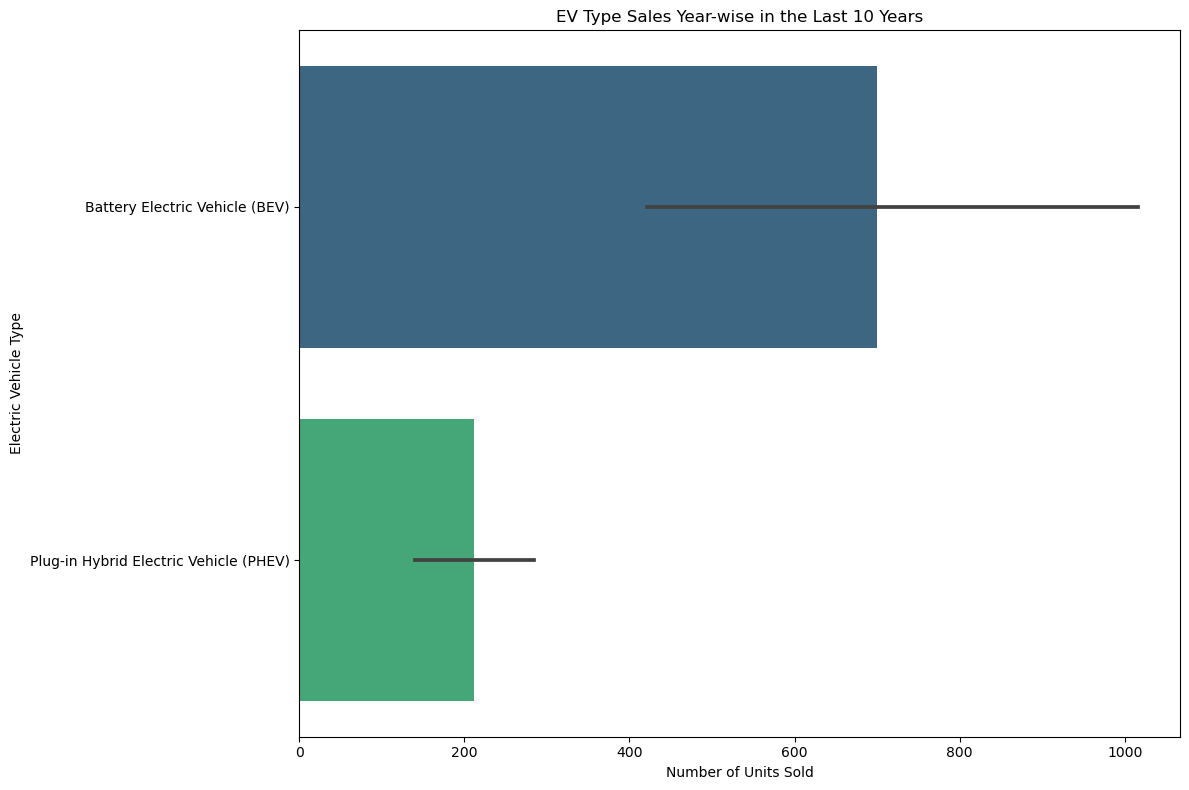

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  # Import seaborn for improved styling

# Assuming your dataset is stored in a DataFrame named 'df'

# Filter data for the last 10 years
current_year = pd.Timestamp.now().year
start_year = current_year - 10

ev_data_last_10_years = df[df['Model Year'].between(start_year, current_year)]

# Create a pivot table to organize data for a clustered bar chart
ev_type_counts_pivot = ev_data_last_10_years.pivot_table(index='Electric Vehicle Type', columns='Model Year', aggfunc='size', fill_value=0)

# Plotting a horizontal clustered bar chart
plt.figure(figsize=(12, 8))
sns.barplot(data=ev_type_counts_pivot.T, palette='viridis', orient='h')  # Set orient to 'h' for horizontal

# Adding labels and title
plt.xlabel('Number of Units Sold')
plt.ylabel('Electric Vehicle Type')
plt.title('EV Type Sales Year-wise in the Last 10 Years')

# Show the plot
plt.tight_layout()  # Adjust layout for better appearance
plt.show()
